# Creating Regularized Regression Models for pH

In [22]:
#Reading in packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
import statsmodels as sm
import pylab as py
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from statsmodels.genmod.generalized_linear_model import GLM
from scipy.stats import spearmanr
import time
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

In [23]:
#Reading in datasets
train = pd.read_csv("/Users/madisongosnell/Desktop/MSA Coding /Individual Project/wine_train.csv")
validation = pd.read_csv("/Users/madisongosnell/Desktop/MSA Coding /Individual Project/wine_validation.csv")
test = pd.read_csv("/Users/madisongosnell/Desktop/MSA Coding /Individual Project/wine_test.csv")

# Applying the Regularized Regression Models to Training Data

## Ridge Regression Model

In [24]:
#Checked GVIF in R - found some multicollinearity so we will use regularized regression
#Performed forward and stepwise selection in R - gave us the same model in both

#Defining the model for Ridge Regression
train = train[['pH', 'Wine Type', 'fixed acidity', 'residual sugar',
               'density', 'alcohol', 'chlorides', 
               'sulphates', 'quality', 'citric acid', 
               'volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide']]
               
train = train.fillna(0)

#Make categorical variables dummy coded
train_dummy = pd.get_dummies(train, columns = ['Wine Type'])
print(train_dummy)

        pH  fixed acidity  residual sugar   density  alcohol  chlorides  \
0     3.38            6.9            6.20  0.992000    12.20      0.027   
1     3.38            8.3            2.30  0.994260    12.70      0.070   
2     3.39            6.4           14.70  0.998275    10.50      0.047   
3     3.39            6.9            1.90  0.995850     9.05      0.082   
4     3.22            5.7           16.00  0.998620     8.90      0.044   
...    ...            ...             ...       ...      ...        ...   
4542  3.39            8.9            1.80  0.996800     9.40      0.077   
4543  3.20            6.6            8.50  0.995760     9.40      0.036   
4544  3.40            6.4            7.90  0.994800    10.20      0.029   
4545  3.00            8.9           15.75  0.996000    12.10      0.035   
4546  3.49            6.5            1.70  0.992800    10.20      0.044   

      sulphates  quality  citric acid  volatile acidity  free sulfur dioxide  \
0          0.49    

In [25]:
#Specifying we want our y(response) to be pH
y = train_dummy['pH']
X = train_dummy.loc[:, train_dummy.columns != 'pH']

wine_ridge = Ridge(alpha = 1.0).fit(X, y)

In [26]:
#Fitting the ridge model
n_alphas = 200
alphas = np.logspace(0.1, 5, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

(0.716143410212902,
 175792.36139586932,
 -0.48150090474026896,
 0.2632241051912789)

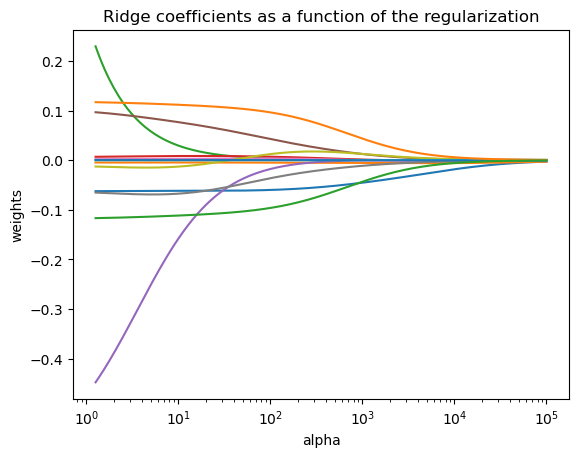

In [27]:
#Plotting the ridge model
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
#Penalty needs to be about 10^5

## Lasso Regression Model

(0.0005011872336272725,
 1995.2623149688789,
 -0.18117298572238086,
 0.2623450335380368)

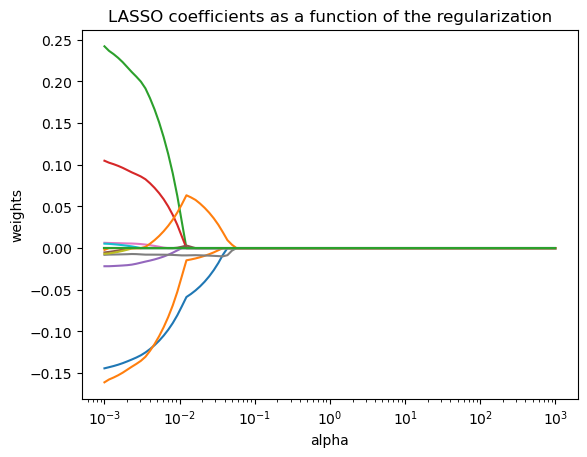

In [28]:
#Applying the lasso regularized regression model

#Standardizing the x values (on different scales)
X_scaled = StandardScaler().fit_transform(X)

n_alphas = 100
alphas2 = np.logspace(-3, 3, n_alphas)

coefs2 = []
for a in alphas2:
   lasso = Lasso(alpha = a, max_iter = 5000)
   lasso.fit(X_scaled, y)
   coefs2.append(lasso.coef_)

#Plotting the lasso model
plt.cla()
ax2 = plt.gca()
ax2.plot(alphas2, coefs2)
ax2.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("LASSO coefficients as a function of the regularization")
plt.axis("tight")

# Applying the Regularized Regression Models to Validation Data

## Ridge Regression Model

In [30]:
#Defining the model for Ridge Regression
validation = validation[['pH', 'Wine Type', 'fixed acidity', 'residual sugar',
               'density', 'alcohol', 'chlorides', 
               'sulphates', 'quality', 'citric acid', 
               'volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide']]

validation = validation.fillna(0)

#Make categorical variables dummy coded
validation_dummy = pd.get_dummies(validation, columns = ['Wine Type'])
print(validation_dummy)

       pH  fixed acidity  residual sugar  density  alcohol  chlorides  \
0    3.19            6.8             6.0  0.99530      9.1      0.050   
1    3.38            6.5            16.5  1.00000      9.5      0.045   
2    3.44            5.8             1.5  0.99115     11.0      0.031   
3    3.34            5.5             4.6  0.99490      9.0      0.029   
4    3.15            6.8            16.1  0.99840      9.3      0.049   
..    ...            ...             ...      ...      ...        ...   
645  3.26            6.3            17.2  0.99884      9.4      0.037   
646  3.36            5.7             9.0  0.99474     10.4      0.053   
647  3.24           10.8             2.5  0.99818     10.8      0.099   
648  3.39            6.9             9.6  0.99780      9.6      0.057   
649  3.20            6.6             5.5  0.99206     11.8      0.029   

     sulphates  quality  citric acid  volatile acidity  free sulfur dioxide  \
0         0.40        5         0.34        

In [31]:
#Specifying we want our y(response) to be pH
y = validation_dummy['pH']
X = validation_dummy.loc[:, validation_dummy.columns != 'pH']

wine_ridge = Ridge(alpha = 1.0).fit(X, y)

In [32]:
#Fitting the ridge model
n_alphas = 200
alphas = np.logspace(0.1, 5, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

(0.716143410212902,
 175792.36139586932,
 -0.11152828768066832,
 0.1477109354177591)

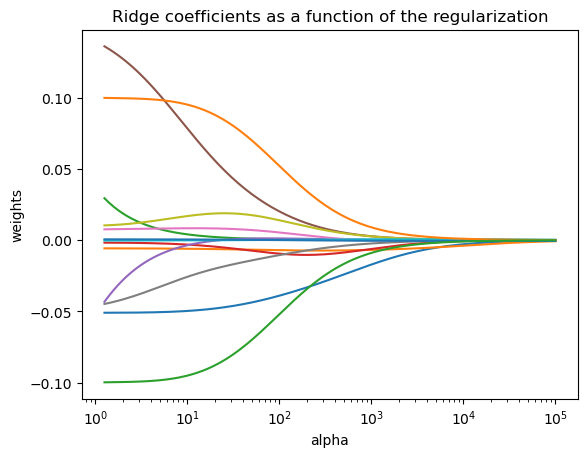

In [33]:
#Plotting the ridge model
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
#Penalty needs to be about 10^4

## Lasso Regression Model

(0.0005011872336272725,
 1995.2623149688789,
 -0.21734607323092453,
 0.324239832230316)

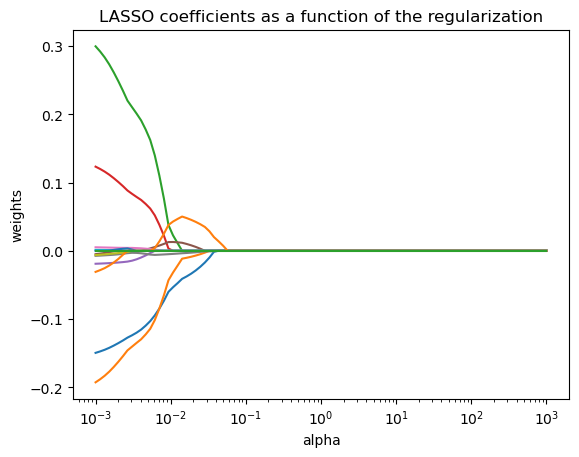

In [34]:
#Standardizing the x values (on different scales)
y = validation_dummy['pH']
X = validation_dummy.loc[:, validation_dummy.columns != 'pH']

X_scaled = StandardScaler().fit_transform(X)

pH_lasso = Lasso(alpha = 2, max_iter = 5000).fit(X_scaled, y)

n_alphas = 100
alphas2 = np.logspace(-3, 3, n_alphas)

coefs2 = []
for a in alphas2:
   lasso = Lasso(alpha = a, max_iter = 5000)
   lasso.fit(X_scaled, y)
   coefs2.append(lasso.coef_)

#Plotting the lasso model
plt.cla()
ax2 = plt.gca()
ax2.plot(alphas2, coefs2)
ax2.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("LASSO coefficients as a function of the regularization")
plt.axis("tight")

# Applying the Regularized Regression Model to Test Data

## Ridge Regression Model

In [36]:
#Defining the model for Ridge Regression
test = test[['pH', 'Wine Type', 'fixed acidity', 'residual sugar',
               'density', 'alcohol', 'chlorides', 
               'sulphates', 'quality', 'citric acid', 
               'volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide']]

test = test.fillna(0)

#Make categorical variables dummy coded
test_dummy = pd.get_dummies(test, columns = ['Wine Type'])
print(test_dummy)

        pH  fixed acidity  residual sugar  density  alcohol  chlorides  \
0     3.23            7.3             4.6  0.99100     13.2      0.028   
1     3.12            7.9             7.4  0.99612      9.5      0.050   
2     3.29            8.0             2.0  0.99720      9.2      0.073   
3     3.22            8.4             3.1  0.99536     12.0      0.194   
4     3.30            7.7             1.9  0.99220     11.8      0.052   
...    ...            ...             ...      ...      ...        ...   
1295  3.13            8.3             0.9  0.99200     10.5      0.050   
1296  3.12            7.1            14.8  0.99518     12.0      0.024   
1297  3.28            6.2             1.7  0.99110     11.2      0.032   
1298  3.10            7.1            13.1  0.99800      8.8      0.050   
1299  3.19            5.6             8.0  0.99429     10.4      0.043   

      sulphates  quality  citric acid  volatile acidity  free sulfur dioxide  \
0          0.43        6       

In [37]:
#Specifying we want our y(response) to be pH
y = test_dummy['pH']
X = test_dummy.loc[:, test_dummy.columns != 'pH']

wine_ridge = Ridge(alpha = 1.0).fit(X, y)

In [38]:
#Fitting the ridge model
n_alphas = 200
alphas = np.logspace(0.1, 5, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

(0.716143410212902,
 175792.36139586932,
 -0.3505531200992813,
 0.12749985548745757)

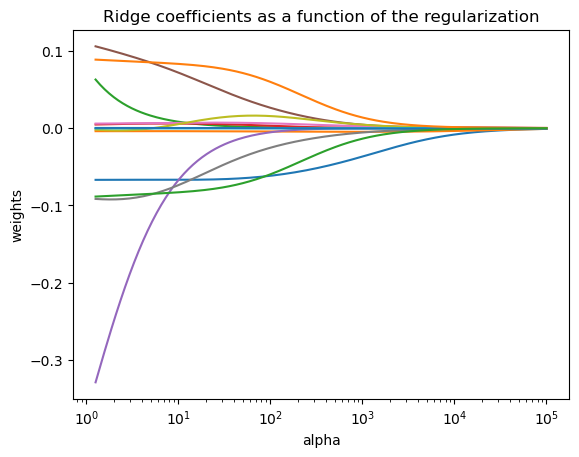

In [39]:
#Plotting the ridge model
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
#Penalty needs to be about 10^4

## Lasso Regression Model

(0.0005011872336272725,
 1995.2623149688789,
 -0.20328108839938322,
 0.29956287289577166)

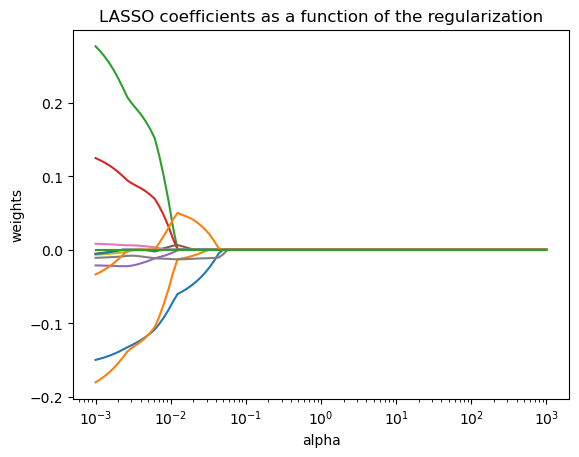

In [40]:
#Standardizing the x values (on different scales)
y = test_dummy['pH']
X = test_dummy.loc[:, test_dummy.columns != 'pH']

X_scaled = StandardScaler().fit_transform(X)

pH_lasso = Lasso(alpha = 2, max_iter = 5000).fit(X_scaled, y)

n_alphas = 100
alphas2 = np.logspace(-3, 3, n_alphas)

coefs2 = []
for a in alphas2:
   lasso = Lasso(alpha = a, max_iter = 5000)
   lasso.fit(X_scaled, y)
   coefs2.append(lasso.coef_)

#Plotting the lasso model
plt.cla()
ax2 = plt.gca()
ax2.plot(alphas2, coefs2)
ax2.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("LASSO coefficients as a function of the regularization")
plt.axis("tight")

# Calculating Mean Absolute Error

In [49]:
#Calculating MAE for the models
y_train = train_dummy['pH']
X_train = train_dummy.loc[:, train_dummy.columns != 'pH']
X_scaled_train = StandardScaler().fit_transform(X_train)

y_test = test_dummy['pH']
X_test = test_dummy.loc[:, test_dummy.columns != 'pH']
X_scaled_test = StandardScaler().fit_transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled_train, y_train)

ridge_preds = ridge.predict(X_scaled_test)
ridge_mae = mean_absolute_error(y_test, ridge_preds)

print("Ridge Regression MAE:", ridge_mae)

Ridge Regression MAE: 0.07518049293961997


In [50]:
lasso = Lasso(alpha=2)  
lasso.fit(X_scaled_train, y_train)

lasso_preds = lasso.predict(X_scaled_test)
lasso_mae = mean_absolute_error(y_test, lasso_preds)

print("Lasso Regression MAE:", lasso_mae)

Lasso Regression MAE: 0.12761508179526654
